# The 4th Down Equation: Analyzing the Interaction Between Offensive EPA and Defensive Pass-Prevention Tendencies

**Team Members:** Nathan Spear, Hayden Kellington, Shivam Sharma

**Date:** 02/15/2026

---

## Research Question

How does going for it on 4th down affect Expected Points Added (EPA) on the play, and does this effect differ based on a defense’s pass-prevention tendencies, measured by opponents’ average depth of target (aDOT) allowed and EPA allowed on deep passing plays?

**Expected Outcomes:**
- Quantifying the "Go for it" Impact: We aim to demonstrate that going for it on 4th down generally results in a positive Expected Points Added (EPA) compared to more conservative play-calling, particularly in short-yardage situations.


- Defensive Shell Sensitivity: We hope to discover if offensive success on 4th down is significantly hindered by defenses with low average depth of target (aDOT) allowed—which suggests a "bend-but-don't-break" or deep-pass-prevention style.


- The "Deep-Pass EPA" Correlation: We want to test the hypothesis that teams facing a defense with a high Deep-Pass EPA allowed will see a higher marginal benefit (EPA gain) when going for it on 4th down passing plays.


- Interaction Effects: We aim to demonstrate that the decision to go for it is not "one size fits all" but is statistically dependent on defensive tendencies, showing that an offense's EPA outcome on 4th down varies predictably when interacting with a defense's historical pass-prevention metrics.


- Data-Driven Decision Making: Ultimately, we hope to provide a framework that moves beyond "offensive confidence" to show that specific pbp-derived defensive metrics (like aDOT and deep-pass EPA) should be primary factors in a team’s 4th-down strategy.

---

## Data Source

**Dataset Name:** nflverse (specifically nflfastR play-by-play data)

**Link:** https://github.com/nflverse/nflfastR-data

**Description:** 
A comprehensive dataset containing play-by-play information for every NFL game. It includes advanced metrics like Expected Points Added (EPA), Win Probability (WP), and specific play details such as air yards, pass location, and personnel.

- Number of observations: Approximately 45,000 to 50,000 plays per regular season. For your specific study on 4th downs, this will be filtered down to roughly 4,000–5,000 observations depending on the years selected.


- Number of features: 370+ variables per play, covering everything from game state (time, score, yard line) to advanced efficiency metrics.

Key variables:


- epa: Expected Points Added on the play (Target Variable).


- fourth_down_attempt: Binary indicator (1 if the team went for it, 0 otherwise).


- air_yards: Distance the ball traveled in the air, used to calculate aDOT.


- pass_length / pass_location: Used to identify deep passing plays.


- defteam: The defensive team, used to aggregate defensive tendency metrics.


- yardline_100: Distance to the opponent's end zone.

- Time period covered: The nflverse repository contains data from 1999 to the 2024 season. Based on your project guidance, you will likely focus on the most recent 2024–2025 data.


- Data collection method: Scraped and cleaned play-by-play data sourced directly from the NFL’s Game Statistics and Information System (GSIS).


**Citation:** 
Carl, S., & Baldwin, B. (2024). nflfastR: Functions to Efficiently Access NFL Play by Play Data. https://www.nflverse.com/.

---

## Setup and Imports

In [1]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn
%pip install pandas
%pip install scipy.stats
%pip install nflfastR


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats
Note: you may need to restart the kernel to use upd

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

%pip install nfl_data_py
import nfl_data_py as nfl

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# For reproducibility
np.random.seed(42)

print("Imports successful!")

#ignore- hayden code
import sys
!{sys.executable} -m pip install matplotlib

# ignore: this is for Nathan's python kernel
import os
import ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Imports successful!
Defaulting to user installation because normal site-packages is not writeable


---

## Data Loading

**TODO:** Load your dataset and perform initial inspection

In [3]:
df = nfl.import_pbp_data([2024, 2025])
df_4th = df[df['down'] == 4].copy()
print(f"Successfully loaded {len(df_4th)} fourth-down plays!")

# Display basic information
if df is not None:
    print(f"Dataset shape: {df_4th.shape}")
    print(f"\nFirst few rows:")
    display(df_4th.head())

2024 done.
2025 done.
Downcasting floats.
Successfully loaded 8569 fourth-down plays!
Dataset shape: (8569, 397)

First few rows:


,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_ta

In [4]:
# TODO: Examine dataset structure
if df_4th is not None:
    print("Dataset Info:")
    df_4th.info()
    
    print("\n" + "="*50)
    print("Summary Statistics:")
    display(df_4th.describe())
    
    print("\n" + "="*50)
    print("Data Types:")
    display(df_4th.dtypes)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8569 entries, 31 to 98253
Columns: 397 entries, play_id to defense_numbers
dtypes: float32(205), int32(7), int64(1), object(184)
memory usage: 19.1+ MB

Summary Statistics:


,play_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passing_yards,receiving_yards,rushing_yards,lateral_receiving_yards,lateral_rushing_yards,tackle_with_assist,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,season,cp,cpoe,series,series_success,order_sequence,play_deleted,special_teams_play,fixed_drive,drive_play_count,drive_first_downs,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,defenders_in_box,number_of_pass_rushers,n_offense,n_defense,ngs_air_yards,time_to_throw
count,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.0,8569.000000,8569.000000,8569.000000,8569.0,8569.000000,8569.000000,8569.000000,8541.000000,8569.000000,8569.000000,8549.000000,8569.000000,8569.0,8569.000000,999.000000,566.000000,6248.000000,8569.000000,8569.000000,8541.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.0,8569.0,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,998.000000,998.000000,8541.000000,8541.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.00


Data Types:


play_id              float32
game_id               object
old_game_id_x         object
home_team             object
away_team             object
                      ...   
defense_names         object
offense_positions     object
defense_positions     object
offense_numbers       object
defense_numbers       object
Length: 397, dtype: object

**Initial Observations:**

- Noise & Complexity: With 397 columns, most data (like jersey numbers or lateral stats) is irrelevant and needs to be dropped to focus on EPA and defensive metrics.

- Missing Values (Sparsity): Metrics like air_yards are missing in ~60% of rows because they only apply to passes. We have to filter for pass_attempt == 1 before calculating aDOT to avoid skewed results.

- Data Integrity: There are roughly 1,000 rows missing EPA (likely timeouts or penalties) which should be removed. While binary indicators (like fourth_down_converted) are stored as floats, they are mathematically sound for regression.

- Range Validation: EPA values (-12.7 to +8.5) and yard lines (1 to 99) are within expected NFL ranges. The 4th-down conversion rate is currently low (~0.6%) because the data includes all downs; this will normalize once filtered for 4th-down attempts only.

---

## Data Cleaning

**TODO:** Clean and preprocess the data

### Missing Values Analysis and Column cleaning

##### filtering columns to include only data points related epa, adot, go-for-it decision, air_yards

In [5]:
keep_cols = [
    # EPA & state
    "epa", "wp", "success", "yardline_100", "ydstogo", "down",
    "game_seconds_remaining", "half_seconds_remaining", "score_differential",

    # Decision / play type
    "play_type", "punt_attempt", "field_goal_attempt",
    "qb_dropback", "rush_attempt",

    # Depth of target
    "air_yards", "yards_after_catch", "pass_length", "pass_location",

    # Teams
    "posteam", "defteam", "home_team", "away_team",
    "season", "week", "game_id",

    # Defensive metrics
    "defenders_in_box", "number_of_pass_rushers",
    "qb_pressure", "blitz"
]

df_4th = df_4th[[c for c in keep_cols if c in df_4th.columns]]
df_4th

,epa,wp,success,yardline_100,ydstogo,down,game_seconds_remaining,half_seconds_remaining,score_differential,play_type,punt_attempt,field_goal_attempt,qb_dropback,rush_attempt,air_yards,yards_after_catch,pass_length,pass_location,posteam,defteam,home_team,away_team,season,week,game_id,defenders_in_box,number_of_pass_rushers
31,0.135574,0.721678,1.0,11.0,4.0,4.0,2700.0,900.0,7.0,field_goal,0.0,1.0,0.0,0.0,NaN,NaN,None,None,ARI,BUF,BUF,ARI,2024,1,2024_01_ARI_BUF,0.0,0.0
43,0.473750,0.286478,1.0,19.0,19.0,4.0,2391.0,591.0,-10.0,field_goal,0.0,1.0,0.0,0.0,NaN,NaN,None,None,BUF,ARI,BUF,ARI,2024,1,2024_01_ARI_BUF,0.0,0.0
93,0.077613,0.359586,1.0,74.0,14.0,4.0,1383.0,1383.0,0.0,punt,1.0,0.0,0.0,0.0,NaN,NaN,None,None,ARI,BUF,BUF,ARI,2024,1,2024_01_ARI_BUF,0.0,0.0
97,0.210434,0.504012,1.0,66.0,7.0,4.0,1288.0,1288.0,0.0,punt,1.0,0.0,0.0,0.0,NaN,NaN,None,None,BUF,ARI,BUF,ARI,2024,1,2024_01_ARI_BUF,0.0,0.0
103,1.343717,0.636436,1.0,12.0,1.0,4.0,1104.0,1104.0,0.0,run,0.0,0.0,0.0,1.0,NaN,NaN,None,None,BUF,ARI,BUF,ARI,2024,1,2024_01_ARI_BUF,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98185,0.668372,0.098653,1.0,67.0,4.0,4.0,1125.0,1125.0,-12.0,punt,1.0,0.0,0.0,0.0,NaN,NaN,None,None,NE,SEA,NE,SEA,2025,22,2025_22_SEA_NE,0.0,0.0
98189,0.382338,0.882721,1.0,73.0,4.0,4.0,1028.0,1028.0,12.0,punt,1.0,0.0,0.0,0.0,NaN,NaN,None,None,SEA,NE,NE,SEA,2025,22,2025_22_SEA_NE,0.0,0.0
98212,1.085521,0.925686,1.0,59.0,11.0,4.0,655.0,655.0,12.0,punt,1.0,0.0,0.0,0.0,NaN,NaN,None,None,SEA,NE,NE,SEA,2025,22,2025_22_SEA_NE,0.0,0.0
98226,0.083911,0.984031,1.0,8.0,4.0,4.0,338.0,338.0,12.0,field_goal,0.0,1.0,0.0,0.0,NaN,NaN,None,None,SEA,NE,NE,SEA,2025,22,2025_22_SEA_NE,0.0,0.0


In [6]:
# TODO: Check for missing values
if df_4th is not None:
    missing = df_4th.isnull().sum()
    missing_pct = (missing / len(df_4th)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Percentage': missing_pct
    }).sort_values('Percentage', ascending=False)
    
    print("Missing Values Summary:")
    display(missing_df[missing_df['Missing Count'] > 0])

Missing Values Summary:


,Missing Count,Percentage
yards_after_catch,8003,93.394795
pass_location,7571,88.353367
pass_length,7571,88.353367
air_yards,7570,88.341697
rush_attempt,28,0.326759
punt_attempt,28,0.326759
field_goal_attempt,28,0.326759
defenders_in_box,20,0.233399
qb_dropback,20,0.233399
number_of_pass_rushers,20,0.233399


In [7]:
# TODO: Handle missing values
# Strategy options:
#1 Drop rows: df = df.dropna()
# 2. Drop columns: df = df.drop(columns=['col_name'])
# 3. Fill with mean/median: df['col'] = df['col'].fillna(df['col'].mean())
# 4. Fill with mode: df['col'] = df['col'].fillna(df['col'].mode()[0])
# 5. Forward/backward fill: df = df.fillna(method='ffill')

# df_clean = df.copy()
# TODO: Implement your cleaning strategy here

# Drop rows where all values are missing
df_4th = df_4th.dropna(how="all")

# Drop rows where all play-related columns are missing (timeouts, penalties, etc.)
play_cols = [
    "play_type",
    "epa",
    "rush_attempt",
    "qb_dropback",
    "punt_attempt",
    "field_goal_attempt"
]
df_4th = df_4th.dropna(subset=play_cols, how="all")

# Drop rows where EPA is missing, since that's our target variable
df_4th = df_4th.dropna(subset=["epa"])

### Duplicate Detection

In [8]:
# TODO: Check for duplicates
if df_4th is not None:
    duplicates = df_4th.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    
    if duplicates > 0:
        print("\nDuplicate rows:")
        display(df[df.duplicated(keep=False)])
        
        # TODO: Decide whether to keep or remove duplicates
        # df_clean = df_clean.drop_duplicates()

Number of duplicate rows: 0


### Data Type Conversions

In [9]:
# TODO: Convert data types as needed
# Examples:
# df_clean['date_column'] = pd.to_datetime(df_clean['date_column'])
# df_clean['category_column'] = df_clean['category_column'].astype('category')
# df_clean['numeric_column'] = pd.to_numeric(df_clean['numeric_column'], errors='coerce')

pass

### Outlier Detection

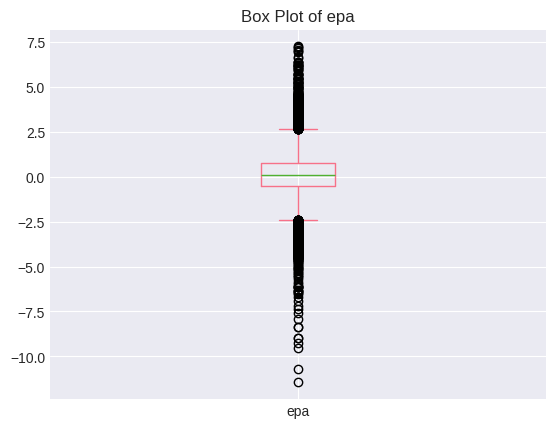

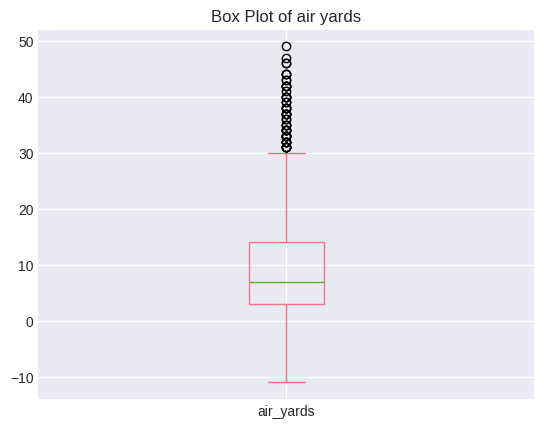

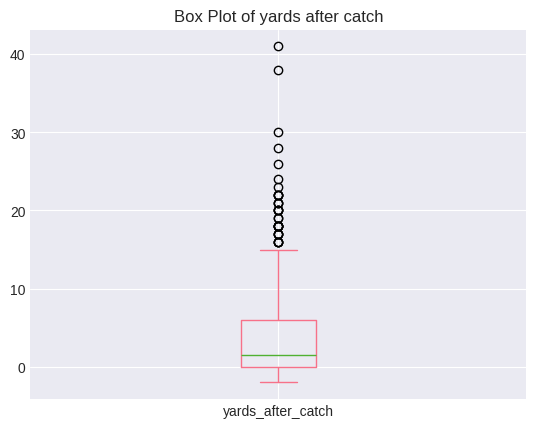

In [10]:
# TODO: Detect outliers in numeric columns
# Common methods:
# 1. IQR method
# 2. Z-score method
# 3. Visual inspection with box plots

# Example: Box plots for numeric columns
# if df is not None:
#     numeric_cols = df.select_dtypes(include=[np.number]).columns
    
#     if len(numeric_cols) > 0:
#         # TODO: Create box plots for numeric columns
#         # fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3*len(numeric_cols)))
#         # for i, col in enumerate(numeric_cols):
#         #     df.boxplot(column=col, ax=axes[i])
#         # plt.tight_layout()
#         # plt.show()
#         pass

df_4th['epa'].plot.box()
plt.title('Box Plot of epa')
plt.show()
# very high variance. possibly not normally distributed

df_4th['air_yards'].plot.box()
plt.title('Box Plot of air yards')
plt.show()
# negative air yards? lots of backward passes on 4th downs? are spikes included?

df_4th['yards_after_catch'].plot.box()
plt.title('Box Plot of yards after catch')
plt.show()
# seems accurate and logical

### Feature Engineering (Optional)

In [11]:
# TODO: Create new features if needed
# Examples:
# - Combine existing features
# - Extract date components (year, month, day of week)
# - Bin continuous variables
# - Encode categorical variables

pass

In [12]:
# TODO: Save cleaned dataset (optional)
# df_clean.to_csv('data/cleaned_data.csv', index=False)
# print("Cleaned data saved!")

**Cleaning Summary:**

TODO: Document what cleaning steps were performed and why:
- Missing values: [strategy used]
- Duplicates: [action taken]
- Outliers: [how handled]
- Feature engineering: [new features created]

---

## Exploratory Data Analysis

**TODO:** Explore the data to understand patterns, relationships, and distributions

### Univariate Analysis

In [13]:
def categorize_4th_down_decision(row):
    """
    helps create clearer decisions so we can look at just not going for it
    (punt/fg) vs going for it (pass/run). things like qb kneel and no plays
    are not relevant to our question, but just in case we decide to incorporate
    them, the following will be a separate column in df_4th as 'decision_type'
    """
    if row['play_type'] == 'punt':
        return 'Punt'
    elif row['field_goal_attempt'] == 1:
        return 'Field Goal'
    elif row['play_type'] == 'pass':
        return 'Pass (Go for it)'
    elif row['play_type'] == 'run':
        return 'Run (Go for it)'
    else:
        return 'Other'

df_4th['decision_type'] = df_4th.apply(categorize_4th_down_decision, axis=1)

print("Count of decision types")
print(df_4th['decision_type'].value_counts())
print("\n")

mean_epa = df_4th.groupby('decision_type')['epa'].mean().sort_values(ascending=False)
print(mean_epa)
print("\n")

mean_epa = df_4th.groupby('play_type')['epa'].mean().sort_values(ascending=False)
print("Mean EPA by play type (separates fouls and qp kneels:")
print(mean_epa)

Count of decision types
Punt                4161
Field Goal          2087
Pass (Go for it)    1084
Run (Go for it)      663
Other                574
Name: decision_type, dtype: int64


decision_type
Run (Go for it)     0.647971
Other               0.274684
Field Goal          0.149352
Pass (Go for it)    0.004523
Punt               -0.105935
Name: epa, dtype: float32


Mean EPA by play type (separates fouls and qp kneels:
play_type
run           0.647971
no_play       0.311010
field_goal    0.149352
pass          0.004523
punt         -0.105935
qb_kneel     -2.615228
Name: epa, dtype: float32


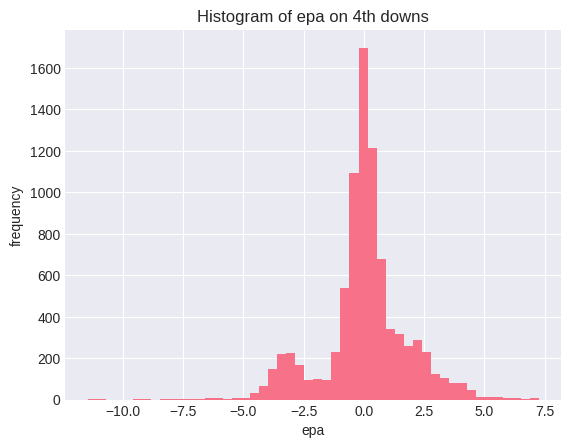

,count,mean,std,min,25%,50%,75%,max
play_type,,,,,,,,
field_goal,2087.0,0.149352,1.647201,-9.526709,0.076394,0.316650,1.054176,3.780886
no_play,549.0,0.311010,1.438130,-2.589484,-0.522612,-0.273642,0.685279,4.486195
pass,1084.0,0.004523,3.165277,-10.723745,-2.871048,-1.006358,3.022142,7.264766
punt,4161.0,-0.105935,0.951107,-7.345287,-0.468489,-0.093480,0.293616,7.190190
qb_kneel,5.0,-2.615228,0.827116,-3.743394,-2.936448,-2.792614,-1.856079,-1.747607
run,663.0,0.647971,2.670020,-11.448006,-2.479767,1.927397,2.342267,6.248553


In [14]:
# TODO: Analyze distributions of individual variables

# Numeric variables - histograms and density plots
# if df_4th is not None:
#     numeric_cols = df_4th.select_dtypes(include=[np.number]).columns
    
#     for col in numeric_cols:
#         fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
#         df_4th[col].hist(bins=30, ax=axes[0], edgecolor='black')
#         axes[0].set_title(f'Histogram of {col}')
#         axes[0].set_xlabel(col)
        
#         df_4th[col].plot(kind='density', ax=axes[1])
#         axes[1].set_title(f'Density Plot of {col}')
#         axes[1].set_xlabel(col)
        
#         plt.tight_layout()
#         plt.show()

epa_hist = df_4th['epa'].hist(bins=50)
epa_hist.set_xlabel('epa')
epa_hist.set_ylabel('frequency')
epa_hist.set_title('Histogram of epa on 4th downs')
plt.show()

df_4th.groupby('play_type')['epa'].describe()

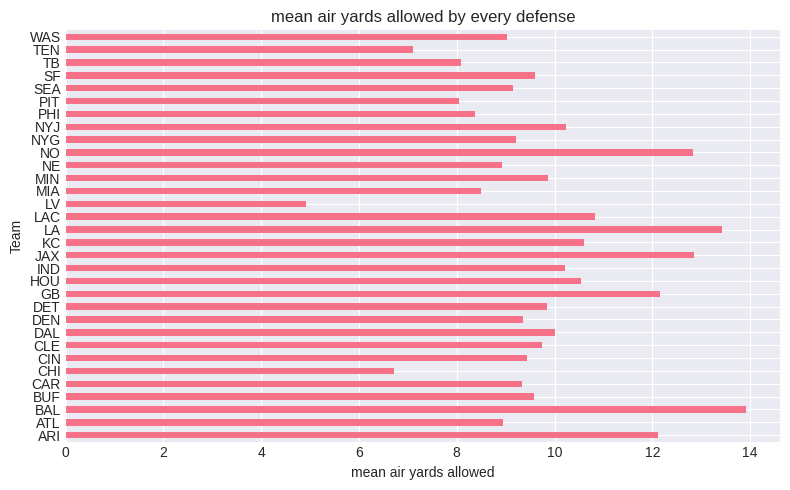

In [15]:
df_4th_pass = df_4th[df_4th['play_type'] == 'pass']
pass_team = df_4th_pass.groupby('defteam')['air_yards'].mean()

# avg air yards (that the ball was thrown) allowed by each defense for pass plays on 4th down
# does not signify a catch occurred

pass_team.plot.barh(
    title='mean air yards allowed by every defense',
    xlabel='mean air yards allowed',
    ylabel='Team',
    figsize=(8, 5)
)

plt.tight_layout()
plt.show()


Mean EPA by Distance and Decision:
decision_type      Field Goal     Other  Pass (Go for it)      Punt  \
distance_category                                                     
Short (1-2)          0.202044  0.115887          0.162989 -0.332981   
Medium (3-5)         0.105870  0.415147          0.399293 -0.139195   
Long (6+)            0.161995  0.290560         -0.675508 -0.064146   

decision_type      Run (Go for it)  
distance_category                   
Short (1-2)               0.647116  
Medium (3-5)              1.220306  
Long (6+)                -0.104178  


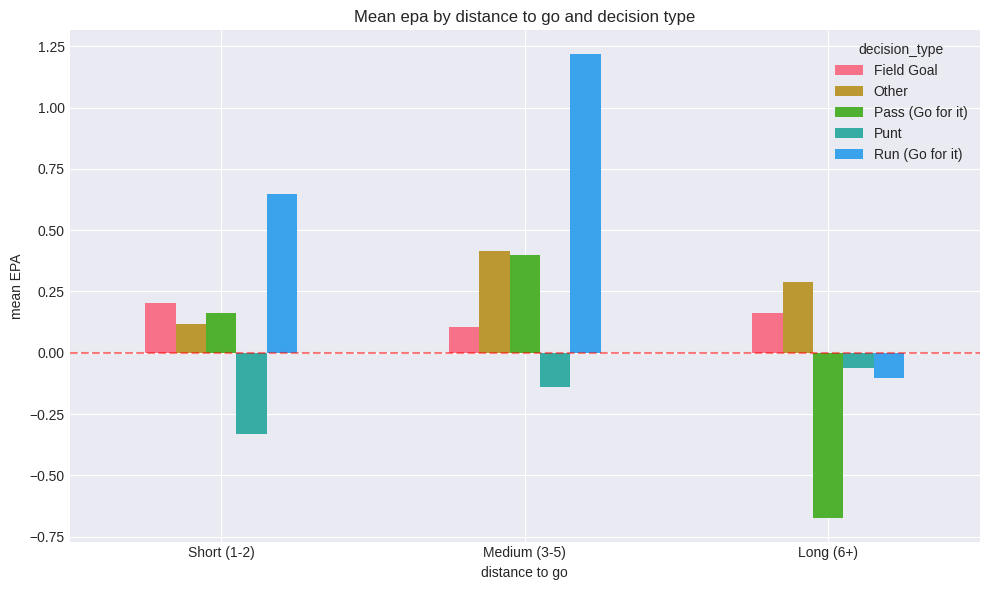

In [16]:
df_4th_copy = df_4th
"""
'distance_category' is created to help visualize what kind of plays teams 
are executing given different buckets of yardage they need. hopefully the
bar chart below can help us think about out later modeling.
"""
df_4th_copy['distance_category'] = pd.cut(
    df_4th_copy['ydstogo'], 
    bins=[0, 2, 5, 100], 
    labels=['Short (1-2)', 'Medium (3-5)', 'Long (6+)']
)

# epa by decision and distance
pivot_table = df_4th_copy.pivot_table(
    values='epa', 
    index='distance_category', 
    columns='decision_type', 
    aggfunc='mean'
)
print("\nMean EPA by Distance and Decision:")
print(pivot_table)

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Mean epa by distance to go and decision type')
plt.xlabel('distance to go')
plt.ylabel('mean EPA')
plt.xticks(rotation=0)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Defensive Metrics:
         adot_allowed  deep_pass_epa_allowed  num_passes_faced  \
defteam                                                          
ARI          7.333033               0.444664              1111   
ATL          7.851852               0.334157              1107   
BAL          8.165898               0.549055              1302   
BUF          7.239933               0.325593              1192   
CAR          7.681186               0.539732              1079   

         num_deep_passes_faced  
defteam                         
ARI                        181  
ATL                        203  
BAL                        257  
BUF                        220  
CAR                        195  


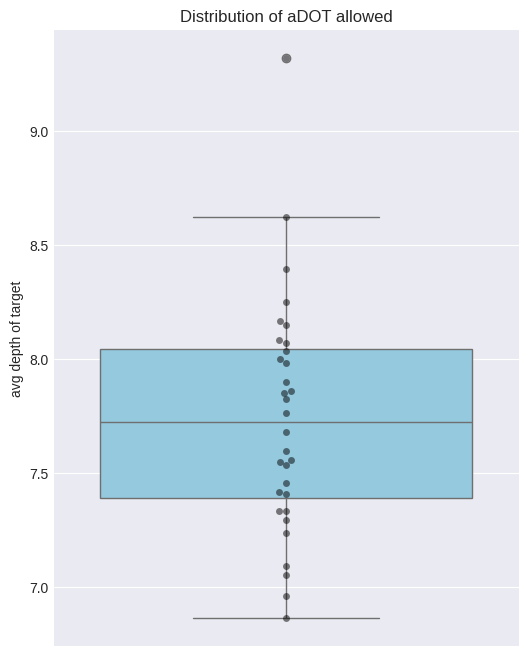

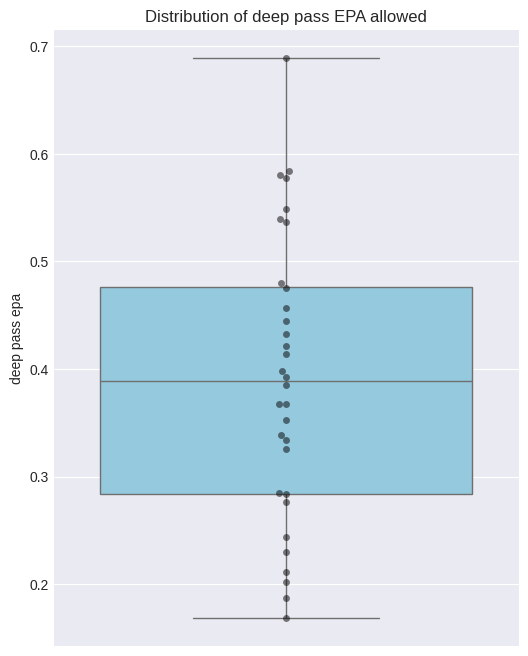

In [17]:
# aDOT allowed first requires us to look at all passes allowed, before we compare to 4th only as we did above
df_passes = df[
    (df['pass_attempt'] == 1) & 
    (df['air_yards'].notna())
].copy()

adot_allowed = df_passes.groupby('defteam')['air_yards'].mean()

# epa allowed on deep passes (pass_length == 'deep')
df_deep_passes = df_passes[df_passes['pass_length'] == 'deep'].copy()
deep_pass_epa_allowed = df_deep_passes.groupby('defteam')['epa'].mean()

# combine into one defensive metrics df
defense_metrics = pd.DataFrame({
    'adot_allowed': adot_allowed,
    'deep_pass_epa_allowed': deep_pass_epa_allowed,
    'num_passes_faced': df_passes.groupby('defteam').size(),
    'num_deep_passes_faced': df_deep_passes.groupby('defteam').size()
})

print("\nDefensive Metrics:")
print(defense_metrics.head())

# merging defensive metrics to 4th down plays these metrics are for ALL downs hence the df_copy
df_4th_copy = df_4th_copy.merge(
    defense_metrics, 
    left_on='defteam', 
    right_index=True, 
    how='left'
)


# boxplot for aDOT allowed
plt.figure(figsize=(6, 8))
sns.boxplot(y=defense_metrics['adot_allowed'], color='skyblue')
sns.swarmplot(y=defense_metrics['adot_allowed'], color='black', alpha=0.5)

plt.title('Distribution of aDOT allowed')
plt.ylabel('avg depth of target')
plt.show()

# boxplot for deep pass epa allowed
plt.figure(figsize=(6, 8))
sns.boxplot(y=defense_metrics['deep_pass_epa_allowed'], color='skyblue')
sns.swarmplot(y=defense_metrics['deep_pass_epa_allowed'], color='black', alpha=0.5)

plt.title('Distribution of deep pass EPA allowed')
plt.ylabel('deep pass epa')
plt.show()

### Bivariate Analysis

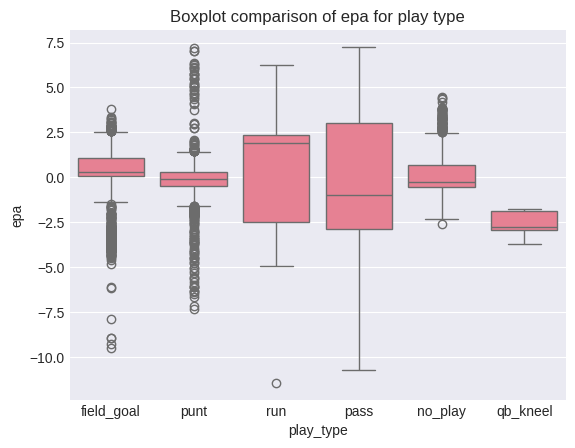

In [18]:
# TODO: Explore relationships between pairs of variables

# Correlation matrix for numeric variables
# if df_clean is not None:
#     numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
#     
#     if len(numeric_cols) > 1:
#         plt.figure(figsize=(10, 8))
#         correlation_matrix = df_clean[numeric_cols].corr()
#         sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
#                     square=True, linewidths=1)
#         plt.title('Correlation Matrix')
#         plt.tight_layout()
#         plt.show()

playtype_boxplot = sns.boxplot(data=df_4th, x='play_type', y='epa')
playtype_boxplot.set_title("Boxplot comparison of epa for play type")
plt.show()

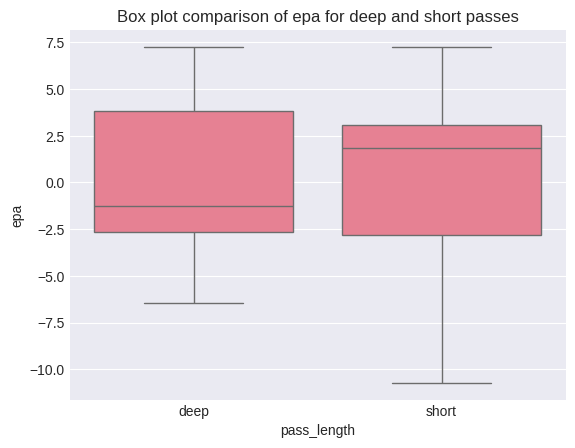

,count,mean,std,min,25%,50%,75%,max
pass_length,,,,,,,,
deep,227.0,0.12404,3.296524,-6.450673,-2.654947,-1.274789,3.822108,7.264766
short,771.0,0.32494,3.088998,-10.723745,-2.812784,1.832943,3.061356,7.254508


In [19]:
df_4th_passlength = df_4th[df_4th['pass_length'].notna()]

passlength_boxplot = sns.boxplot(data=df_4th_pass, x='pass_length', y='epa')
passlength_boxplot.set_title("Box plot comparison of epa for deep and short passes")
plt.show()

df_4th_passlength.groupby('pass_length')['epa'].describe()

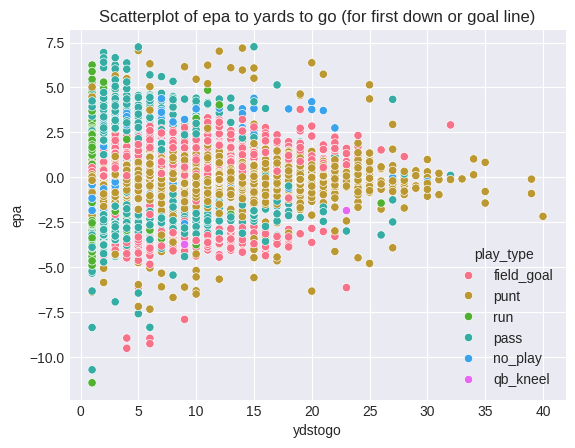

In [20]:
# TODO: Scatter plots for key variable pairs
# plt.figure(figsize=(8, 6))
# plt.scatter(df_clean['var1'], df_clean['var2'], alpha=0.5)
# plt.xlabel('Variable 1')
# plt.ylabel('Variable 2')
# plt.title('Relationship between Var1 and Var2')
# plt.show()

playtype_scatter = sns.scatterplot(data=df_4th, x='ydstogo', y='epa', hue='play_type')
playtype_scatter.set_title("Scatterplot of epa to yards to go (for first down or goal line)")
plt.show()
# not fun to look at
# yards to go is for first down or goal line

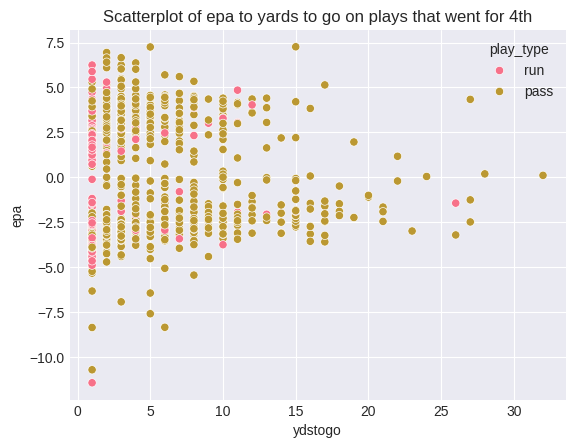

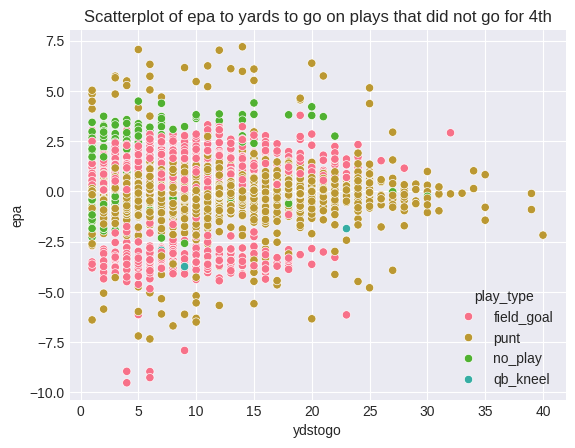

In [21]:
didplay = ['run','pass']
df_4th_copy['went_for_it'] = df_4th_copy['play_type'].isin(didplay).astype(int)

df4_copy_wentforit = df_4th_copy[df_4th_copy['went_for_it'] == 1]

playtype_scatter = sns.scatterplot(data=df4_copy_wentforit, x='ydstogo', y='epa', hue='play_type')
playtype_scatter.set_title("Scatterplot of epa to yards to go on plays that went for 4th")
plt.show()

df4_copy_didnotgo = df_4th_copy[df_4th_copy['went_for_it'] == 0]

playtype_scatter = sns.scatterplot(data=df4_copy_didnotgo, x='ydstogo', y='epa', hue='play_type')
playtype_scatter.set_title("Scatterplot of epa to yards to go on plays that did not go for 4th")
plt.show()

# no_play indicates a flag occurred which may be significant


In [22]:
# TODO: Group comparisons
# if df_clean is not None:
#     # Example: Compare numeric variable across categories
#     # df_clean.groupby('category_col')['numeric_col'].describe()
#     
#     # Box plot by group
#     # plt.figure(figsize=(10, 6))
#     # sns.boxplot(x='category_col', y='numeric_col', data=df_clean)
#     # plt.xticks(rotation=45)
#     # plt.tight_layout()
#     # plt.show()
    
pass

### Multivariate Analysis

In [23]:
# TODO: Explore relationships among multiple variables

# Pair plot for selected variables
# if df_clean is not None:
#     # Select key columns for pair plot
#     # key_cols = ['col1', 'col2', 'col3', 'target']
#     # sns.pairplot(df_clean[key_cols], hue='target')
#     # plt.show()
    
pass

**EDA Findings:**

TODO: Summarize key insights from your exploratory analysis:
- What are the main patterns in the data?
    - Going for it does appear to have a greater EPA than not going for it, with runs being much more beneficial than passes.
    - Shorter fourth downs favored going for it very heavily, but this quickly turns negative once the fourth down is longer than 6 yards.
    - Passes are much more punished than runs, with passing having a much larger (and more negatively skewed) EPA range than running.
    - Deep passes are on average less beneficial to epa than short passes.
    - EPA hovers around 0 which makes sense since an EPA of 0 signifies an "average" play or an expected outcome.
- Are there any unexpected findings?
    - Field goals have significant negative skew of epa and this could be because of missed 3rd and shorts where the expectation of a touchdown or 1st down close to the endzone greatly outweighed the benefit of a field goal attempt.
    - Punts have a massive variance of epa and this could be because epa is heavily dependent on field position and probability of converting a third and short (which would be missed to result in a punt).
    - For all plays (ie not just 4th) defenses allow a positive epa for the deep pass. Additionally, aDOT allowed is nearly 8 yards on average, which is much lower (nearly half) than the minimum qualification of a 'deep ball'.
- Which variables seem most relevant to your research question?
    - We need to explore more of the 4th and short scenarios since that is where the majority of 'go for it' data lies.
    - Field position is also important to consider since it is a large contributor to EPA.
    - Yards to go (to first down/endzone) is important since it is not necessarily field position.
    - Need to explore more of the defensive aspects.
- Are there any data quality issues that need addressing?
    - Data is solid, need to make sure we understand variables and metrics we are creating/analyzing since there are a lot.



Other questions I should answer (later):
- Do teams that go for it on 4th down see higher EPA than those that punt/kick?
- What situations (yards to go, field position, score) favor going for it?
- Do defenses that prevent deep passes see lower EPA allowed on 4th down attempts?
- Do offenses adjust their play calling (air yards) based on defensive tendencies?

---

## Modeling and Analysis

**TODO:** Build and evaluate models to answer your research question

### Data Preparation for Modeling

In [24]:
# TODO: Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    roc_auc_score
)

#Use data where teams "went for it" (pass or run)
df_model = df_4th_copy[df_4th_copy['went_for_it'] == 1].copy()

# Binary indicator for pass plays
df_model['pass_play'] = (df_model['play_type'] == 'pass').astype(int)

X = df_model[
    ['ydstogo', 'yardline_100', 'adot_allowed', 'pass_play']]

#Target variables (epa for linreg)
y_epa = df_model['epa']

X_train, X_test, y_epa_train, y_epa_test = (
    train_test_split(
        X,
        y_epa,
        test_size=0.25,
        random_state=42
    )
)

### Model 1: Linear Regression

**TODO:** Describe the model and why you chose it

In [25]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_epa_train)

y_epa_pred = lin_model.predict(X_test)

rmse = mean_squared_error(y_epa_test, y_epa_pred)
r2 = r2_score(y_epa_test, y_epa_pred)

rmse, r2

(8.460351941310426, 0.02148280674955627)

In [26]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'linear_coef': lin_model.coef_
})

coef_df

,feature,linear_coef
0,ydstogo,-0.063880
1,yardline_100,0.004167
2,adot_allowed,-0.183855
3,pass_play,-0.462804


#### Linear Regression pt2 (Pass/Run seperate)

In [27]:
run_df  = df_model[df_model["pass_play"] == 0].copy()
pass_df = df_model[df_model["pass_play"] == 1].copy()

features = ["ydstogo", "yardline_100", "adot_allowed"]
target = "epa"

from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    run_df[features], run_df[target], test_size=0.3, random_state=42
)

Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    pass_df[features], pass_df[target], test_size=0.3, random_state=42
)

from sklearn.linear_model import LinearRegression

run_model = LinearRegression()
pass_model = LinearRegression()

run_model.fit(Xr_train, yr_train)
pass_model.fit(Xp_train, yp_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Run model
run_rmse = np.sqrt(mean_squared_error(yr_test, run_model.predict(Xr_test)))
run_r2 = r2_score(yr_test, run_model.predict(Xr_test))

# Pass model
pass_rmse = np.sqrt(mean_squared_error(yp_test, pass_model.predict(Xp_test)))
pass_r2 = r2_score(yp_test, pass_model.predict(Xp_test))

run_rmse, run_r2, pass_rmse, pass_r2

(2.5617855, -0.006725094400428011, 3.1643007, -0.0004413461425836207)

In [29]:
run_coefs = pd.DataFrame({
    "feature": features,
    "coefficient": run_model.coef_
})

pass_coefs = pd.DataFrame({
    "feature": features,
    "coefficient": pass_model.coef_
})
print('Feature Coefficients (Run only)')
print(run_coefs)
print("\n")

print("Feature Coefficients (Pass only)")
print(pass_coefs)
print("\n")

Feature Coefficients (Run only)
        feature  coefficient
0       ydstogo    -0.067168
1  yardline_100     0.004998
2  adot_allowed    -0.023434


Feature Coefficients (Pass only)
        feature  coefficient
0       ydstogo    -0.076479
1  yardline_100    -0.002435
2  adot_allowed    -0.291117




In [30]:
# TODO: Make predictions and evaluate
# y_pred = model.predict(X_test_scaled)

# print("Model Performance:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

pass

### Model 2: Interaction-Based Linear Regression

This model will test the hypothesis that teams facing defenses with high deep-pass EPA allowed will see a higher marginal EPA gain on 4th down passing plays.

In [34]:
# TODO: Train and evaluate second model

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create the interaction terms, shows how passing it interacts with what the defense does
df_model['pass_x_adot'] = df_model['pass_play'] * df_model['adot_allowed']

# EPA ~ Base Features + Interaction Term
formula = "epa ~ ydstogo + yardline_100 + pass_play + adot_allowed + pass_x_adot"

# fit the model using OLS (gives better statistical summaries for research)
interaction_model = smf.ols(formula=formula, data=df_model).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    epa   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.014
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           1.69e-06
Time:                        05:25:28   Log-Likelihood:                -4381.7
No. Observations:                1747   AIC:                             8775.
Df Residuals:                    1741   BIC:                             8808.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1958      1.826      0.655   

### Model Comparison

In [35]:
# TODO: Compare model performance
# Create a comparison table or visualization

# results_df = pd.DataFrame({
#     'Model': ['Model 1', 'Model 2'],
#     'Accuracy': [acc1, acc2],
#     'Precision': [prec1, prec2],
#     'Recall': [rec1, rec2],
#     'F1-Score': [f1_1, f1_2]
# })
# display(results_df)


from sklearn.metrics import mean_squared_error, r2_score

# predictions
y_pred = interaction_model.predict(df_model)

# Metrics
rmse = np.sqrt(mean_squared_error(df_model['epa'], y_pred))
r2 = r2_score(df_model['epa'], y_pred)

print(f"Interaction Model RMSE: {rmse:.4f}")
print(f"Interaction Model R2 Score: {r2:.4f}")
pass

Interaction Model RMSE: 2.9719
Interaction Model R2 Score: 0.0197


### Feature Importance (Optional)

/tmp/ipykernel_2013/1871795938.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='magma')


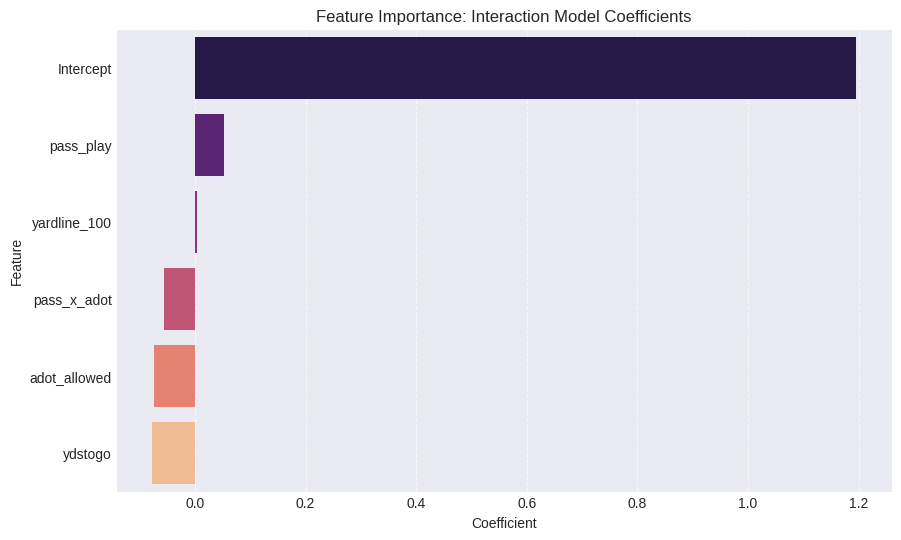

In [36]:
# TODO: Analyze feature importance (if applicable)
# if hasattr(model, 'feature_importances_'):
#     importance_df = pd.DataFrame({
#         'Feature': X.columns,
#         'Importance': model.feature_importances_
#     }).sort_values('Importance', ascending=False)
#     
#     plt.figure(figsize=(10, 6))
#     plt.barh(importance_df['Feature'], importance_df['Importance'])
#     plt.xlabel('Importance')
#     plt.title('Feature Importance')
#     plt.gca().invert_yaxis()
#     plt.tight_layout()
#     plt.show()


# df of coefficients for visualization
importance_df = pd.DataFrame({
    'Feature': interaction_model.params.index,
    'Coefficient': interaction_model.params.values
}).sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='magma')
plt.title('Feature Importance: Interaction Model Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Modeling Results:**

TODO: Summarize your modeling findings:
- Which model performed best and why?
- What are the most important predictors?
- Are there any limitations or concerns with the models?
- Do the results answer your research question?

---

## Conclusions and Future Work

**TODO:** Summarize your project and findings

### Key Findings

TODO: List your main discoveries:
1. 
2. 
3. 

### Limitations

TODO: What are the limitations of this analysis?
- 
- 

### Future Work

TODO: What could be done to extend or improve this analysis?
- 
- 

### Recommendations

TODO: Based on your findings, what actions or decisions do you recommend?
- 
- 

---

## References

TODO: List all data sources, papers, and resources used:

1. 
2. 
3. 